In [1]:
#self_confining.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'fast_gravity = ', fast_gravity
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'monitor = ', monitor

r.shape =  (1001, 2, 241)
total_ring_mass =  5e-10
shear_viscosity =  2.5e-12
bulk_viscosity =  2.5e-12
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.01, 'e_prime': 0.0}
fast_gravity =  False
e.min() =  0.00929748595281853
e.max() =  0.010500620235177664
monitor =  {'current_time': 1602819233, 'streamline_crossing_timestep': None, 'start_time': 1602818261, 'modified_params': None, 'nan_timestep': None, 'current_timestep': 600000}


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale
print 'times_viscous.max() = ', times_viscous.max()

viscous_timescale =  2999.9999999999995
times_viscous.max() =  100.00000000000001


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [5]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = orbit_deltas(times, r, a, e, wt)

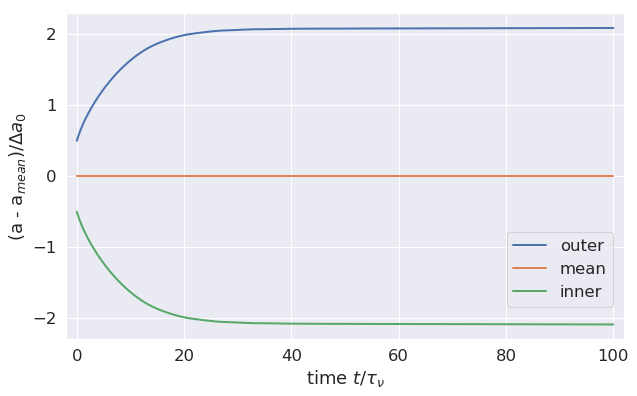

In [6]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.set_xlim(-2, 102)
p = ax.legend(loc=(0.79, 0.1))
plt.savefig('figs/a_nominal.pdf', bbox_inches='tight')

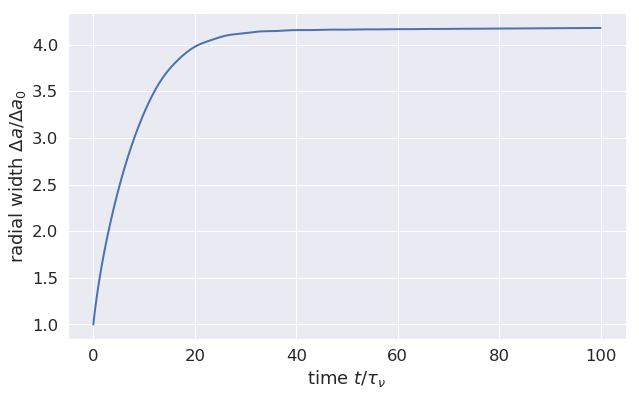

In [7]:
#plot delta_a versus time
x = times_viscous
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
#p = ax.set_xlim(-2, 102)
plt.savefig('figs/da_nominal.pdf', bbox_inches='tight')

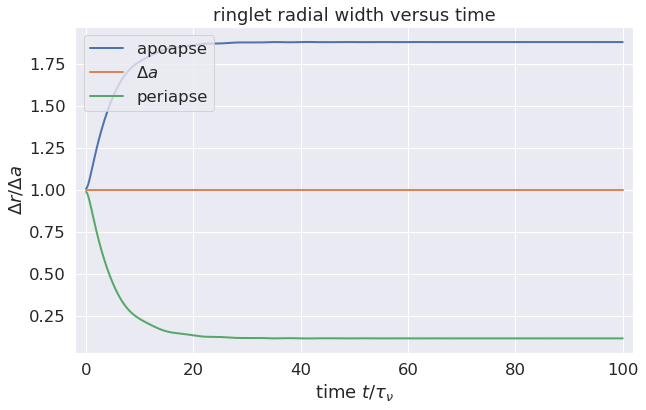

In [8]:
#plot streamline's dr_peri and dr_apo vs time
q_inner = a_inner*(1.0 - e_inner)
q_outer = a_outer*(1.0 - e_outer)
Q_inner = a_inner*(1.0 + e_inner)
Q_outer = a_outer*(1.0 + e_outer)
dr_peri = q_outer - q_inner
dr_apo = Q_outer - Q_inner
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = dr_apo/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='apoapse')
y = da/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta a$')
y = dr_peri/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='periapse')
p = ax.set_title('ringlet radial width versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta r/\Delta a$')
p = ax.set_xlim(-2, 102)
p = ax.legend()

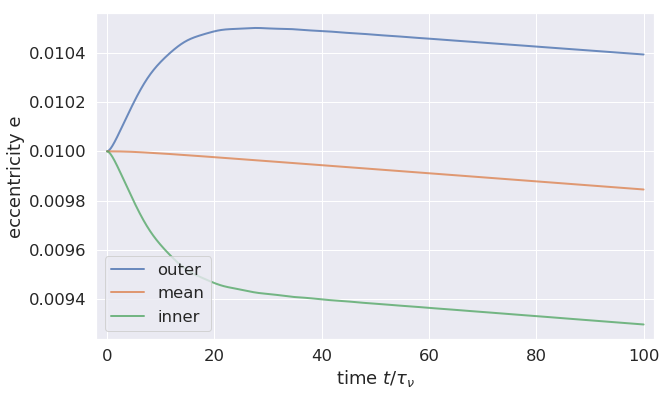

In [9]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_xlim(-2, 102)
p = ax.legend()
plt.savefig('figs/e_nominal.pdf', bbox_inches='tight')

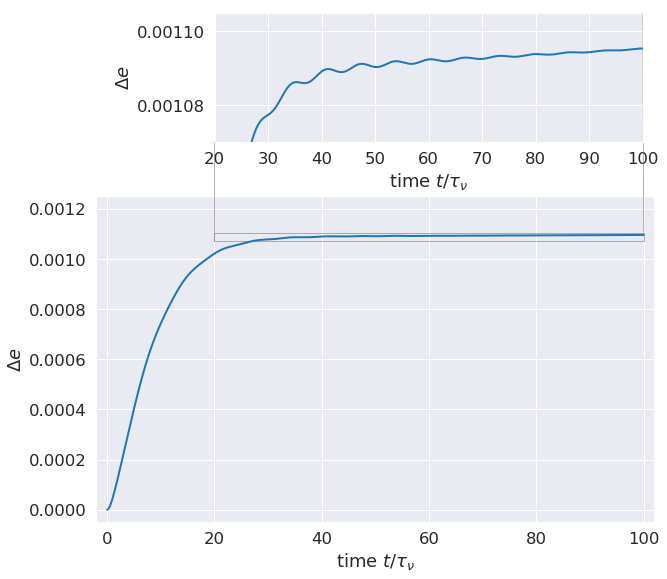

In [10]:
#plot de versus time
x = times_viscous
y = de
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(figsize=(10, 6))
left, bottom, width, height = [0.289, 1.005, 0.595, 0.3]
ax_inset = fig.add_axes([left, bottom, width, height])
color = color_seq[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, color=color)
p = ax_inset.plot(x, y, linestyle='-', linewidth=2, color=color)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$')
p = ax.set_xlim(-2, 102)
p = ax.set_ylim(-0.00005, 0.00125)
p = ax_inset.set_xlim(20, 100)
p = ax_inset.set_ylim(0.00107, 0.001105)
p = ax_inset.set_xlabel(r'time $t/\tau_\nu$')
p = ax_inset.set_ylabel(r'$\Delta e$')
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, ax_inset, loc1=3, loc2=1, edgecolor='gray', alpha=0.6)
plt.savefig('figs/de_nominal_zoom.pdf', bbox_inches='tight')

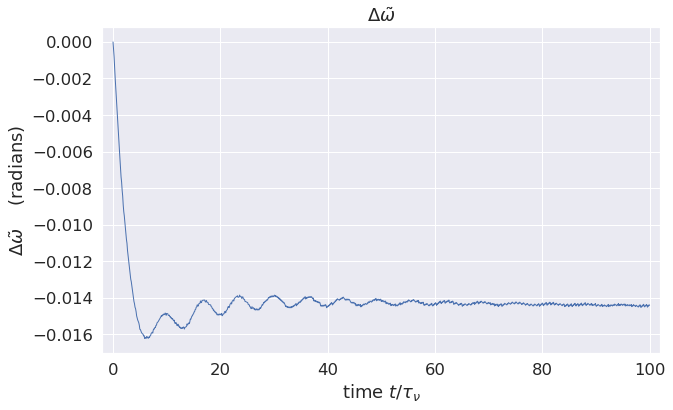

In [11]:
#plot dwt versus time
x = times_viscous
y = dwt
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
p = ax.set_xlim(-2, 102)
#p = ax.set_ylim(-0.037, 0.0)

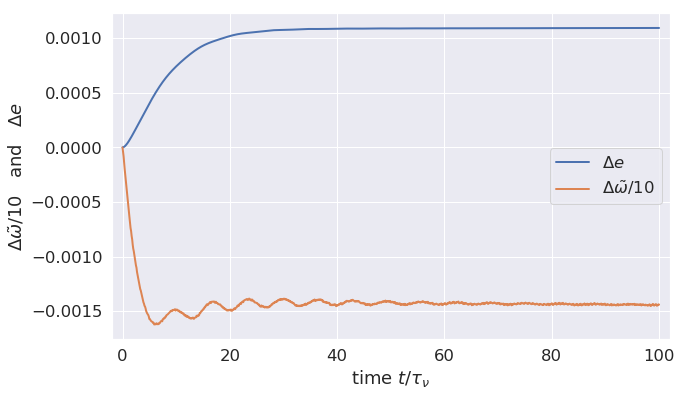

In [12]:
#plot de and dwt aversus time
x = times_viscous
y = de
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = dwt/10
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}/10$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}/10$   and   $\Delta e$')
p = ax.set_xlim(-2, 102)
p = ax.legend()
plt.savefig('figs/de_dwt_nominal.pdf', bbox_inches='tight')

In [13]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H.mean()

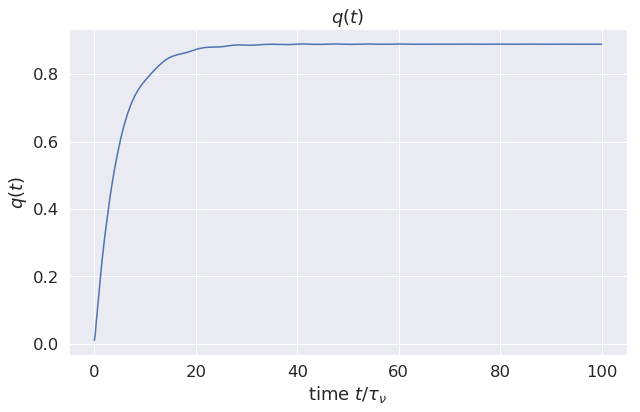

In [14]:
#plot q versus time
x = times_viscous
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$q(t)$')

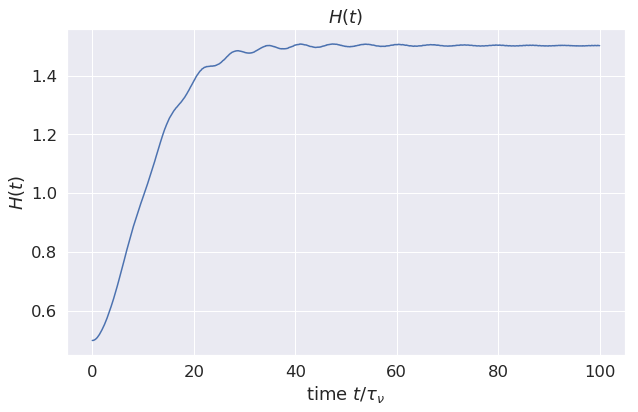

In [15]:
#plot H(q) versus time
x = times_viscous
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$H(t)$')

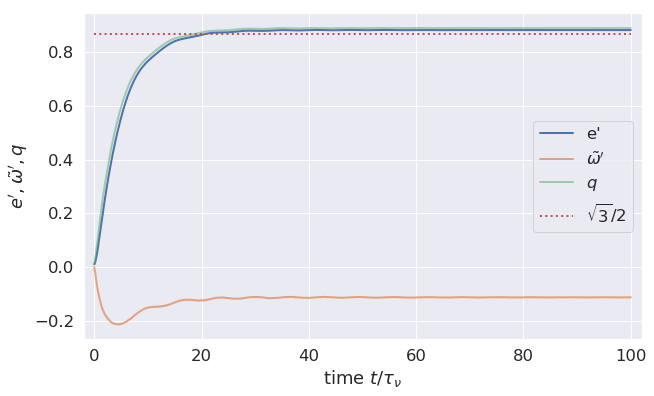

In [16]:
#plot e_prime wt_prime and q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.7, label=r"$\tilde{\omega}'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e', \tilde{\omega}', q$")
p = ax.set_xlim(-2, 102)
p = ax.legend()
plt.savefig('figs/de_prime_nominal.pdf', bbox_inches='tight')

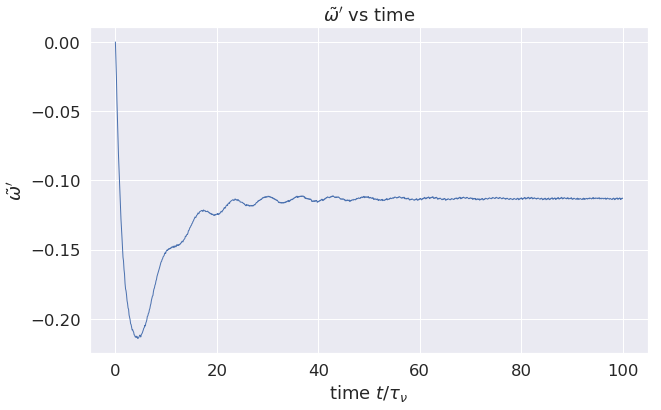

In [17]:
#plot wt_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = ax.set_title(r"$\tilde{\omega}'$ vs time")

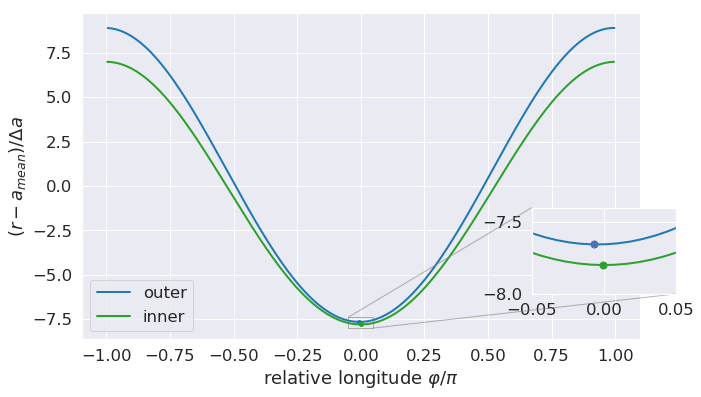

In [18]:
#plot streamlines planetocentric distance versus relative longitude
tidx = len(times) - 1
r1, t1, vr1, vt1, wt1 = peri_corotate(r[tidx].copy(), t[tidx].copy(), vr[tidx].copy(), vt[tidx].copy(), 
    wt[tidx].copy())
a1 = a_mean[tidx]
da1 = da[tidx]
xp = t1/np.pi
yp = (r1 - a1)/da1
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(figsize=(10, 6))
left, bottom, width, height = [0.75, 0.23, 0.2, 0.2]
ax_inset = fig.add_axes([left, bottom, width, height])
idx = 1
color = color_seq[0]
jdx = r1[idx].argmin()
p = ax.plot(xp[idx], yp[idx], linestyle='-', linewidth=2, color=color, label='outer')
p = ax_inset.plot(xp[idx], yp[idx], linestyle='-', linewidth=2, color=color)
p = ax.plot(xp[idx][jdx], yp[idx][jdx], marker='o', markersize=4, color=color, label='')
p = ax_inset.plot(xp[idx][jdx], yp[idx][jdx], marker='o', markersize=7, label='')
idx = 0
color = color_seq[2]
jdx = r1[idx].argmin()
p = ax.plot(xp[idx], yp[idx], linestyle='-', linewidth=2, color=color, label='inner')
p = ax_inset.plot(xp[idx], yp[idx], linestyle='-', linewidth=2, color=color)
p = ax.plot(xp[idx][jdx], yp[idx][jdx], marker='o', markersize=4, color=color, label='')
p = ax_inset.plot(xp[idx][jdx], yp[idx][jdx], marker='o', markersize=7, color=color, label='')
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'$(r - a_{mean})/\Delta a$')
p = ax_inset.set_xlim(-0.05, 0.05)
p = ax_inset.set_ylim(-8.0, -7.4)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, ax_inset, loc1=2, loc2=4, edgecolor='gray', alpha=0.6)
p = ax.legend()
plt.savefig('figs/nominal_streamlines.pdf', bbox_inches='tight')

("e' = ", 0.010030986447075363)
("e' = ", 0.604666770014076)
("e' = ", 0.7965315078070967)
("e' = ", 0.8822551806080372)


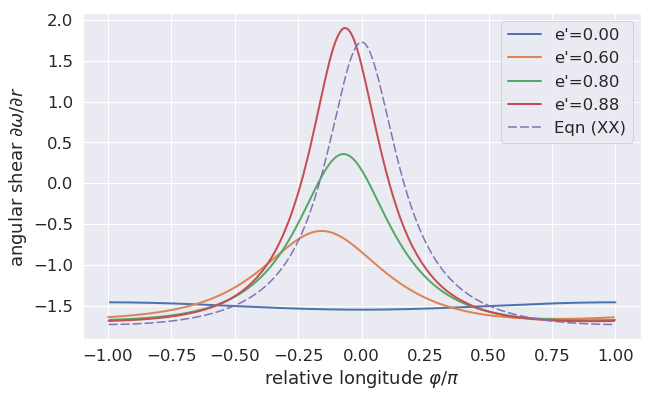

In [19]:
#show that angular shear reverses sign when eccentricity gradient gets large enough
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
tidx = 0
print ("e' = ", e_prime[tidx])
r1, t1, vr1, vt1, wt1 = peri_corotate(r[tidx].copy(), t[tidx].copy(), vr[tidx].copy(), vt[tidx].copy(), 
    wt[tidx].copy())
omega = vt1/r1
delta_omega = omega[1] - omega[0]
delta_r = r1[1] - r1[0]
dw_dr = delta_omega/delta_r
xp = t1[0]/np.pi
yp = dw_dr
p = ax.plot(xp, yp, linestyle='-', linewidth=2, label="e'=0.00")
tidx =  57
print ("e' = ", e_prime[tidx])
r1, t1, vr1, vt1, wt1 = peri_corotate(r[tidx].copy(), t[tidx].copy(), vr[tidx].copy(), vt[tidx].copy(), 
    wt[tidx].copy())
omega = vt1/r1
delta_omega = omega[1] - omega[0]
delta_r = r1[1] - r1[0]
dw_dr = delta_omega/delta_r
xp = t1[0]/np.pi
yp = dw_dr
p = ax.plot(xp, yp, linestyle='-', linewidth=2, label="e'=0.60")
tidx =  117
print ("e' = ", e_prime[tidx])
r1, t1, vr1, vt1, wt1 = peri_corotate(r[tidx].copy(), t[tidx].copy(), vr[tidx].copy(), vt[tidx].copy(), 
    wt[tidx].copy())
omega = vt1/r1
delta_omega = omega[1] - omega[0]
delta_r = r1[1] - r1[0]
dw_dr = delta_omega/delta_r
xp = t1[0]/np.pi
yp = dw_dr
p = ax.plot(xp, yp, linestyle='-', linewidth=2, label="e'=0.80")
tidx = len(times) - 1
print ("e' = ", e_prime[tidx])
r1, t1, vr1, vt1, wt1 = peri_corotate(r[tidx].copy(), t[tidx].copy(), vr[tidx].copy(), vt[tidx].copy(), 
    wt[tidx].copy())
omega = vt1/r1
delta_omega = omega[1] - omega[0]
delta_r = r1[1] - r1[0]
dw_dr = delta_omega/delta_r
xp = t1[0]/np.pi
yp = dw_dr
p = ax.plot(xp, yp, linestyle='-', linewidth=2, label="e'=0.88")
ep = np.sqrt(3.0)/2.0
M = xp*np.pi
ep_cosM = ep*np.cos(M)
yp = -(3.0/2.0)*(1 - 4*ep_cosM/3)/(1 - ep_cosM)
p = ax.plot(xp, yp, linestyle='dashed', dashes=[6, 2], linewidth=1.5, label="Eqn (XX)")
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'angular shear $\partial\omega/\partial r$')
p = plt.legend()
plt.savefig('figs/nominal_shear.pdf', bbox_inches='tight')

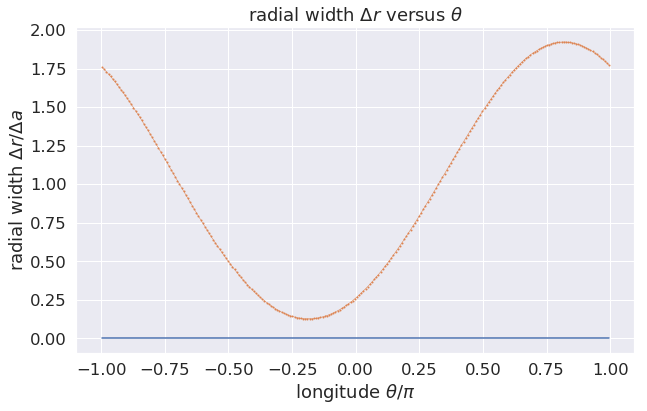

In [20]:
#inspect final radial width versus longitude
rt = r[tidx]
r0 = rt[0]
r1 = rt[1] - r0
r0 = r0 - r0
at = a[tidx]
a0 = at[0]
a1 = at[1]
delta_a = a1.mean() - a0.mean()
tt = t[tidx]
t0 = tt[0]
t1 = tt[1]
f, ax = plt.subplots(figsize=(10, 6))
x = t0/np.pi
y = r0/delta_a
p = ax.plot(x, y, linestyle='-')
x = t1/np.pi
y = r1/delta_a
p = ax.plot(x, y, linestyle='-', linewidth=0.5, marker='.', markersize=2)
p = ax.set_title(r'radial width $\Delta r$ versus $\theta$')
p = ax.set_xlabel(r'longitude $\theta/\pi$')
p = ax.set_ylabel(r'radial width $\Delta r/\Delta a$')

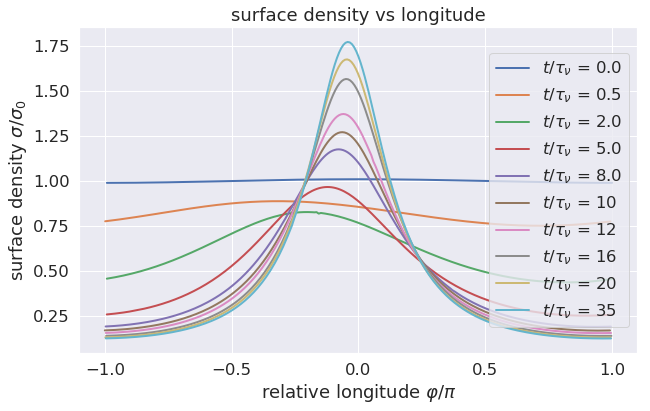

In [21]:
#plot surface density vs longitude
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
plot_times = [0.0, 0.5, 2.0, 5.0, 8.0, 10.0, 12.0, 16.0, 20.5, 35.0]
middle_index = number_of_streamlines/2
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    r_now = r[t_idx]
    t_now = t[t_idx]
    wt_now = wt[t_idx]
    delta_r = delta_f(r_now, t_now)
    sd_now = surface_density(lambda0, delta_r)
    r_middle = r_now[middle_index]
    t_middle = t_now[middle_index]
    wt_middle = wt_now[middle_index]
    sd_middle = sd_now[middle_index]
    pidx = r_middle.argmin()
    wt_min = wt_middle[pidx]
    t_rotating = adjust_angle(t_middle - wt_min)
    if (t_idx == 0):
        sd_initial = sd_now.mean()
    y = sd_middle/sd_initial
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$t/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    if (lbl[-1] == '.'):
        lbl = lbl[:-1]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'surface density vs longitude')
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='center right')
plt.savefig('figs/nominal_sigma_vs_longitude.pdf', bbox_inches='tight')

relative_longitude =  -0.002538933906324592 idx =  105
[0.         3.4564673  3.43695612 0.        ]
relative_longitude =  3.140059936491014 idx =  226
[0.         0.25994681 0.25999764 0.        ]
relative_longitude =  1.5604403179888993 idx =  164
[0.         0.46307177 0.45969266 0.        ]
relative_longitude =  -1.5655046077848649 idx =  46
[0.         0.59263178 0.59560936 0.        ]


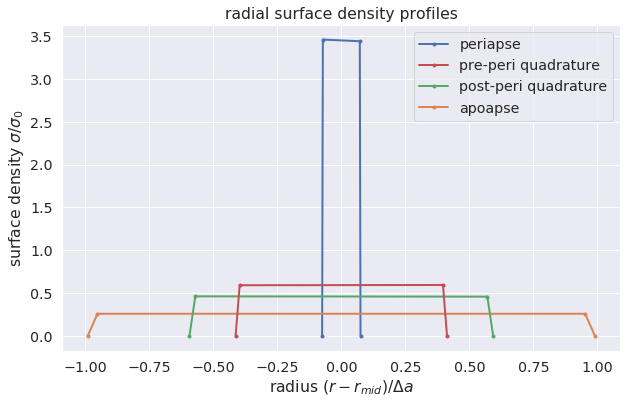

In [22]:
#plot radial cuts of surface density...surface density contrast = 3.521/0.260 = 13.5
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
t_idx = total_number_of_outputs
r_now = r[t_idx]
t_now = t[t_idx]
wt_now = wt[t_idx]
delta_r = delta_f(r_now, t_now)
sd_now = surface_density(lambda0, delta_r)
sd_mean = sd_now.mean()
r_middle = r_now[middle_index]
#sd(r) along periapse
idx = r_middle.argmin() + 1
idx_peri = idx
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='periapse')
print (yp)
#sd(r) along apoapse
idx = r_middle.argmax() + 1
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
idx_apo = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='apoapse')
print (yp)
#sd(r) along post-periapse quadrature
idx = (idx_peri + idx_apo)/2 - 1
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='post-peri quadrature')
print (yp)
#sd(r) along pre-periapse quadrature
idx = idx_peri - (idx_apo - idx_quad) + 3
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='pre-peri quadrature')
print (yp)
p = ax.set_title(r'radial surface density profiles')
p = ax.set_xlabel(r'radius $(r - r_{mid})/\Delta a$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.legend()
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 3, 2, 1]
p = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig('figs/radial_sigma_nominal.pdf', bbox_inches='tight')

In [23]:
#compute viscous angular momentum flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
from fluxes import *
viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = \
    calculate_angular_momentum_flux(lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity, confine_edges)

In [24]:
#compute gravitational angular momentum flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = \
    calculate_angular_momentum_flux(lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity, confine_edges)

In [25]:
#viscous angular momentum flux & luminosity for circular ring at time=0
a0 = a_mean[0]
w0 = Omega(J2, Rp, a0)
viscous_flux_circular = 1.5*shear_viscosity*sd_initial*a0*w0
viscous_luminosity_circular = viscous_flux_circular*2*np.pi*a0

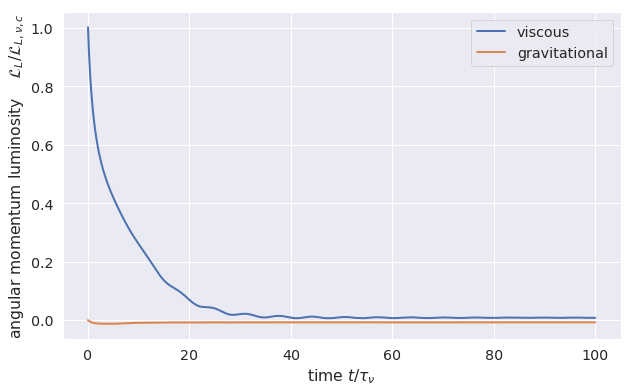

In [26]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravitational')
p = ax.set_ylabel(r'angular momentum luminosity    ${\cal L}_{L}/{\cal L}_{L,\nu,c}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()
plt.savefig('figs/angular_momentum_luminosity_nominal.pdf', bbox_inches='tight')

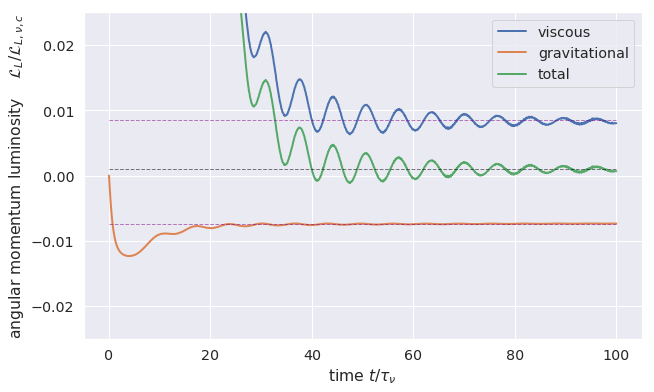

In [27]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravitational')
y = (viscous_angular_momentum_luminosity + grav_angular_momentum_luminosity)/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='total')
y = x*0 + 0.001
p = ax.plot(x, y, linestyle='dashed', linewidth=1, label='', color='black', alpha=0.5)
y = x*0 + 0.0085
label = r'$+0.0085$'
label = ''
p = ax.plot(x, y, linestyle='dashed', linewidth=1, label=label, color='purple', alpha=0.5)
y = x*0 - 0.0075
label = r'$-0.0075$'
label = ''
p = ax.plot(x, y, linestyle='dashed', linewidth=1, label=label, color='purple', alpha=0.5)
p = ax.set_ylabel(r'angular momentum luminosity    ${\cal L}_{L}/{\cal L}_{L,\nu,c}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.025, 0.025)
p = ax.legend()
plt.savefig('figs/angular_momentum_luminosity_zoom_nominal.pdf', bbox_inches='tight')

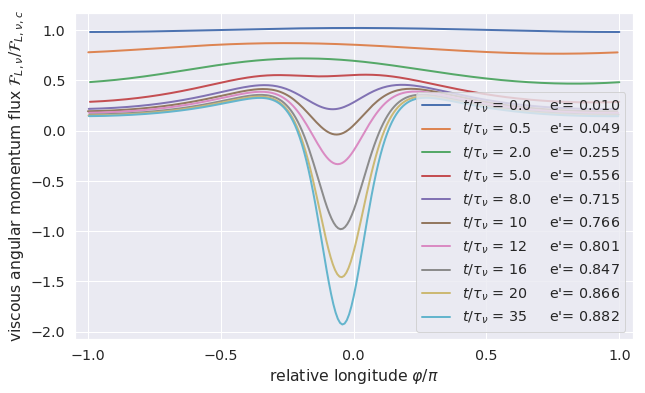

In [28]:
#plot viscous angular monentum flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    angular_momentum_flux_now = viscous_angular_momentum_flux[t_idx]
    r_now = rc[t_idx]
    t_now = tc[t_idx]
    wt_now = wtc[t_idx]
    pidx = r_now.argmin()
    wt_min = wt_now[pidx]
    t_rotating = adjust_angle(t_now - wt_min)
    y = angular_momentum_flux_now/viscous_flux_circular
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    e_prime_now = e_prime[t_idx]
    lbl = r'$t/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    if (lbl[-1] == '.'): 
        lbl = lbl[0:-1] + ' '
    lbl += '    e\'= ' + '{:f}'.format(e_prime_now)[0:5]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux ${\cal F}_{L,\nu}/{\cal F}_{L,\nu,c}$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.set_xlim(-1.05, 1.05)
p = ax.legend(loc='lower right')
plt.savefig('figs/F_nu_nominal.pdf', bbox_inches='tight')

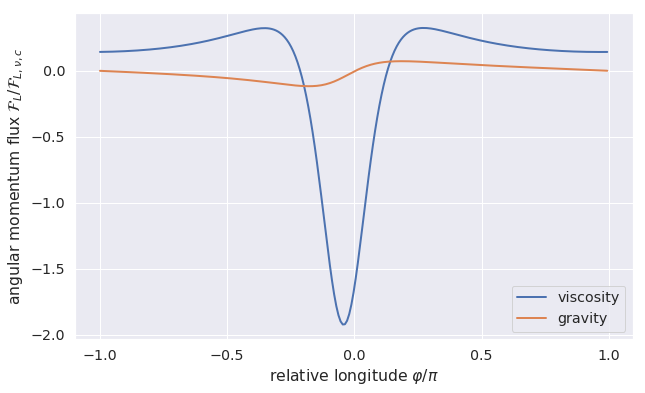

In [29]:
#plot final angular monentum fluxes vs longitude
f, ax = plt.subplots(figsize=(10, 6))
angular_momentum_flux_now = viscous_angular_momentum_flux[-1]
r_now = rc[-1]
t_now = tc[-1]
wt_now = wtc[-1]
pidx = r_now.argmin()
wt_min = wt_now[pidx]
t_rotating = adjust_angle(t_now - wt_min)
y = angular_momentum_flux_now/viscous_flux_circular
x = t_rotating/np.pi
idx = np.argsort(t_rotating)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscosity')
angular_momentum_flux_now = grav_angular_momentum_flux[-1]
y = angular_momentum_flux_now/viscous_flux_circular
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravity')
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'angular momentum flux ${\cal F}_{L}/{\cal F}_{L,\nu,c}$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')
plt.savefig('figs/F_vs_longitude_nominal.pdf', bbox_inches='tight')

In [30]:
#compute viscous energy flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
viscous_energy_flux, viscous_energy_luminosity, rc, tc, wtc = calculate_energy_flux(
    lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity, confine_edges)
viscous_energy_flux_circular = viscous_flux_circular*w0
viscous_energy_luminosity_circular = viscous_luminosity_circular*w0

In [31]:
#compute gravitational energy flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_energy_flux, grav_energy_luminosity, rc, tc, wtc = calculate_energy_flux(
    lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity, confine_edges)

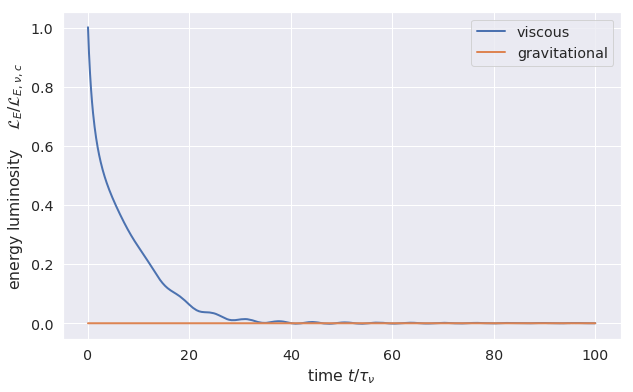

In [32]:
#plot energy luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscous')
y = grav_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravitational')
p = ax.set_ylabel(r'energy luminosity    ${\cal L}_{E}/{\cal L}_{E,\nu,c}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()
plt.savefig('figs/nominal_energy_luminosity.pdf', bbox_inches='tight')

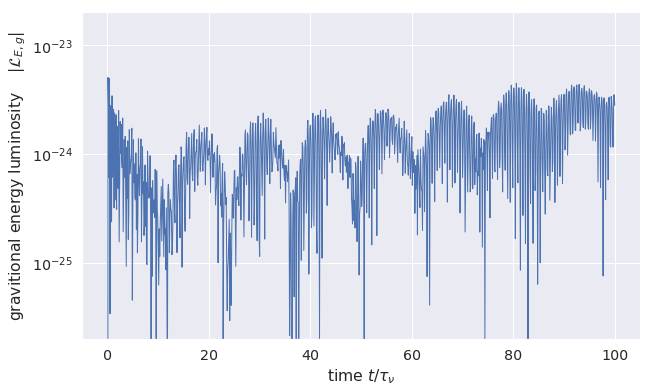

In [33]:
#plot grav_energy_luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = np.abs(grav_energy_luminosity)
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_ylabel(r'gravitional energy luminosity    $|{\cal L}_{E,g}|$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(2.0e-26, 2.0e-23)
p = ax.set_yscale('log')
plt.savefig('figs/nominal_gravitational_energy_luminosity.pdf', bbox_inches='tight')

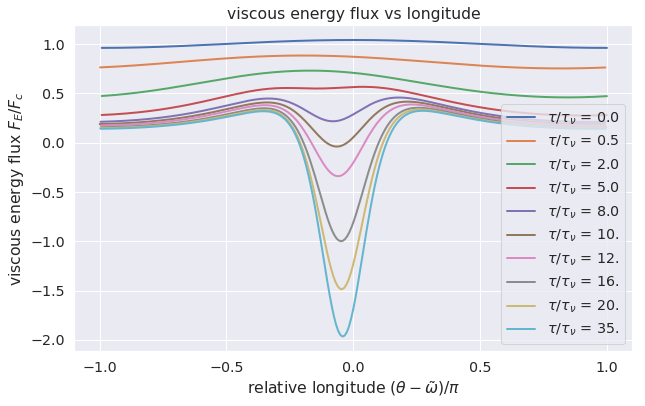

In [34]:
#plot viscous energy flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    viscous_energy_flux_now = viscous_energy_flux[t_idx]
    r_now = rc[t_idx]
    t_now = tc[t_idx]
    wt_now = wtc[t_idx]
    pidx = r_now.argmin()
    wt_min = wt_now[pidx]
    t_rotating = adjust_angle(t_now - wt_min)
    y = viscous_energy_flux_now/viscous_energy_flux_circular
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous energy flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous energy flux $F_E/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')

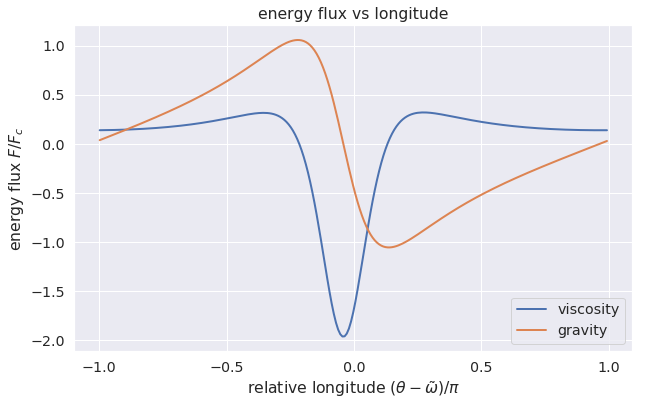

In [35]:
#plot final energy fluxes vs longitude
f, ax = plt.subplots(figsize=(10, 6))
energy_flux_now = viscous_energy_flux[-1]
r_now = rc[-1]
t_now = tc[-1]
wt_now = wtc[-1]
pidx = r_now.argmin()
wt_min = wt_now[pidx]
t_rotating = adjust_angle(t_now - wt_min)
y = energy_flux_now/viscous_energy_flux_circular
x = t_rotating/np.pi
idx = np.argsort(t_rotating)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscosity')
energy_flux_now = grav_energy_flux[-1]
y = 100*energy_flux_now/viscous_energy_flux_circular
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravity')
p = ax.set_title(r'energy flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'energy flux $F/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='lower right')